In [1]:
import pandas as pd
import numpy as np
import re # para expresiones regulares
import emoji #convertir emoticones a texto
import nltk #tokenizar y stopwords
nltk.download("punkt") # PARA seccion // Revisión de texto informal y tokenización *******
nltk.download('stopwords') # descarga de las stopwords de NLTK
import stanza #lematizar ***************
import matplotlib.pyplot as plt# presentar las graficas
from wordcloud import WordCloud #generar la nube de palabras

[nltk_data] Downloading package punkt to C:\Users\Usuario
[nltk_data]     iTC\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Usuario
[nltk_data]     iTC\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
C:\Users\Usuario iTC\AppData\Roaming\Python\Python38\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [8]:
#Importamos el dataset de depresion y el dataset de datos aleatorios
tweets_depresivos_df = pd.DataFrame(pd.read_excel("../Extraccion_Tweets/Dataset_depresivo_limpieza_manual.xlsx")) 
tweets_random_df = pd.DataFrame(pd.read_excel("../Extraccion_Tweets/Dataset_random_limpieza_manual.xlsx")) 
tweets_depresivos_df.head()

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1.339913e+18,1.339913e+18,"2020-12-18 07:37:28 Hora est. Pacífico, Sudamé...",2020-12-18,07:37:28,-500,1558953666,johasolano27,Joha Solano♥️,NaN,...,"-1.3695361279507605,-78.08139447223985,27.9857...",NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
1,1.369100e+18,1.369100e+18,"2021-03-08 20:35:50 Hora est. Pacífico, Sudamé...",2021-03-08,20:35:50,-500,64263405,estebanacostab,esteban acosta,NaN,...,"-1.3695361279507605,-78.08139447223985,27.9857...",NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
2,1.401985e+18,1.401985e+18,"2021-06-07 14:32:44 Hora est. Pacífico, Sudamé...",2021-06-07,14:32:44,-500,1242893257555824896,librasequilibra,Mel ♎️,NaN,...,"-1.3695361279507605,-78.08139447223985,27.9857...",NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
3,1.373680e+18,1.373680e+18,"2021-03-21 11:56:55 Hora est. Pacífico, Sudamé...",2021-03-21,11:56:55,-500,75320297,flakissguevara,Andrea Guevara,NaN,...,"-1.3695361279507605,-78.08139447223985,27.9857...",NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
4,1.368780e+18,1.368780e+18,"2021-03-07 23:24:07 Hora est. Pacífico, Sudamé...",2021-03-07,23:24:07,-500,75320297,flakissguevara,Andrea Guevara,NaN,...,"-1.3695361279507605,-78.08139447223985,27.9857...",NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN


Eliminamos registros duplicados y atributos que no son de utilidad.

In [9]:
#eliminamos registros duplicados
tweets_depresivos_df = tweets_depresivos_df.drop_duplicates()
tweets_random_df = tweets_random_df.drop_duplicates()

In [10]:
#eliminamos los atributos que no son de utildad
tweets_depresivos_df.drop(['conversation_id', 'created_at', 'timezone', 'user_id', 'username', 'name', 'place', 'source', 'user_rt_id', 'user_rt', 'retweet_id', 'reply_to', 'retweet_date', 'translate', 'trans_src', 'trans_dest', 'language', 'mentions', 'urls', 'photos', 'replies_count', 'retweets_count', 'likes_count', 'hashtags', 'cashtags', 'link', 'retweet', 'quote_url', 'video', 'thumbnail', 'near'], axis = 1, inplace = True)
tweets_random_df.drop(['conversation_id', 'created_at', 'timezone', 'user_id', 'username', 'name', 'place', 'source', 'user_rt_id', 'user_rt', 'retweet_id', 'reply_to', 'retweet_date', 'translate', 'trans_src', 'trans_dest', 'language', 'mentions', 'urls', 'photos', 'replies_count', 'retweets_count', 'likes_count', 'hashtags', 'cashtags', 'link', 'retweet', 'quote_url', 'video', 'thumbnail', 'near'], axis = 1, inplace = True)
tweets_depresivos_df.head()

,id,date,time,tweet,geo
0,1.339913e+18,2020-12-18,07:37:28,"A veces es válido sentirse agobiada, desespera...","-1.3695361279507605,-78.08139447223985,27.9857..."
1,1.369100e+18,2021-03-08,20:35:50,"Estoy angustiado, maldición. No sé qué hacer. ...","-1.3695361279507605,-78.08139447223985,27.9857..."
2,1.401985e+18,2021-06-07,14:32:44,"Cerré de nuevo mis redes, no pude con tanta an...","-1.3695361279507605,-78.08139447223985,27.9857..."
3,1.373680e+18,2021-03-21,11:56:55,"La depresión, las crisis de ansiedad y los ata...","-1.3695361279507605,-78.08139447223985,27.9857..."
4,1.368780e+18,2021-03-07,23:24:07,Jajaja la ansiedad social no es algo nuevo. Mu...,"-1.3695361279507605,-78.08139447223985,27.9857..."


### Eliminación de menciones, hashtags y URLS.

In [11]:
#Palabras que no son tomadas en cuenta en la eliminacion de caracteres repetidos
palabras_excluidas=['facebook','mood','boomerang', 'boomer', 'tattoo', 'cool','feeling',
                   'descoord','tweet','desee','cree','lee'] 

def limpiar_texto(texto):
    texto = re.sub(r'@[A-Za-z0-9_]+', '', texto) #Remueve menciones
    texto = re.sub(r"[#]+", '', texto) #Remueve hashtags
    #eliminamos caracteres repetidos
    #res = any(bool(if palabra in texto.lower()) for palabra in palabras_excluidas)
    res = any(bool(True if palabra in texto else False) for palabra in palabras_excluidas)
    if not res: #no hay exclusiones
        texto = re.sub(r'(a|e|i|o|u|A|E|I|O|U)\1+', r'\1', texto) # vocales repetidas
    return texto

tweets_depresivos_df['tweet'] = tweets_depresivos_df['tweet'].apply(limpiar_texto)
tweets_random_df['tweet'] = tweets_random_df['tweet'].apply(limpiar_texto)
#tweets_depresivos_df.head()

### Limpieza de símbolos y caracteres especiales

Eliminamos los símbolos, números y espacios extra presente en los tweets

In [12]:
#eliminamos simbolos especiales, numeros y espacios repetidos
def limpiar_signos(texto):
    texto = re.sub(r'[\“\”\¨‘’,;.…:¡!¡°«»《》•¿?@#$%&[\](){}<>~=+\-–—*/|\\_^`"\']', '', texto) #eliminando simbolos
    texto = re.sub('\d', '', texto) #eliminando numeros presentes en el texto
    texto = re.sub(r'(\s)\1+', r'\1', texto)  #elimina espacios extra en el texto
    return texto

tweets_depresivos_df['tweet'] = tweets_depresivos_df['tweet'].apply(limpiar_signos)
tweets_random_df['tweet'] = tweets_random_df['tweet'].apply(limpiar_signos)

Convertimos los emojis presentes en los tweets a texto.

In [13]:
#conversion de emoticones a texto en idioma español
def convertir_emojis(texto):
    texto=emoji.demojize(texto, language='es')  # 💔 --> :corazón_roto:
    return texto

tweets_depresivos_df['tweet'] = tweets_depresivos_df['tweet'].apply(convertir_emojis)
tweets_random_df['tweet'] = tweets_random_df['tweet'].apply(convertir_emojis)

# Eliminamos texto de emojis repetidos, unidos y espacios generados por la conversión.
def depurar_emojis(texto):
    texto = re.sub(r'([:][A-Za-z_]+[:])\1+', r'\1', texto)  #eliminar emojis repetidos
    texto = re.sub(r' ?([:][A-Za-z_]+[:]) ?', r' \1 ', texto) #separar emojis unidos
    texto = re.sub(r'(\s)\1+', r'\1', texto)  #eliminar espacios excesivos generados en la separacion de emojis
    texto = re.sub(r'[:]', '', texto)  #elim. los ":" del formato de emoji a texto :cara_triste:-->cara_triste
    return texto

tweets_depresivos_df['tweet'] = tweets_depresivos_df['tweet'].apply(depurar_emojis)
tweets_random_df['tweet'] = tweets_random_df['tweet'].apply(depurar_emojis)

Quitamos las tildes presentes en el texto.

In [14]:
#ELIMINAR TILDES
def quitar_tilde(s):
    reemplazo = (   #se reemplazan las vocales con tilde por su equivalente sin tilde
        ("á", "a"),
        ("é", "e"),
        ("í", "i"),
        ("ó", "o"),
        ("ú", "u"),
        ("ü", "u"),
    )
    for a, b in reemplazo:
        s = s.replace(a, b)
    return s

tweets_depresivos_df['tweet'] = tweets_depresivos_df['tweet'].apply(quitar_tilde)
tweets_random_df['tweet'] = tweets_random_df['tweet'].apply(quitar_tilde)

### Conversión de los tweets a minúsculas

In [15]:
#Se convierten todo el texto de los tweets a minúsculas
tweets_depresivos_df['tweet'] = tweets_depresivos_df['tweet'].str.lower()
tweets_random_df['tweet'] = tweets_random_df['tweet'].str.lower()

### Revisión de texto informal y tokenización

In [16]:
#exportamos el conjunto de datos 
tweets_depresivos_df.to_excel("Dataset_depresivo_semiLimpio.xlsx", index=False)
tweets_random_df.to_excel("Dataset_random_semiLimpio.xlsx", index=False)

In [17]:
#Cargamos nuevamente los datos limpiados en Openrefine
import warnings
warnings.simplefilter("ignore")

tweets_depresivos_df = pd.DataFrame(pd.read_excel("Dataset_depresivo_Openrefine.xlsx")) 
tweets_random_df = pd.DataFrame(pd.read_excel("Dataset_random_Openrefine.xlsx"))

Tokenización

In [18]:
# importamos el metodo word tokenize
from nltk.tokenize import word_tokenize #divide una oración en tokens o palabras
def tokenizar(texto):
    texto=word_tokenize(texto)
    return texto

tweets_depresivos_df.insert(4, "tweet_token", tweets_depresivos_df['tweet'].apply(tokenizar), True)
tweets_random_df.insert(4, "tweet_token", tweets_random_df['tweet'].apply(tokenizar), True)
#se presenta una previa de los tweets tokenizados en "tweet_token", del dataset depresivo
tweets_depresivos_df.head()

,id,date,time,tweet,tweet_token,geo
0,1.339913e+18,2020-12-18,07:37:28,a veces es valido sentirse agobiada desesperad...,"[a, veces, es, valido, sentirse, agobiada, des...","-1.3695361279507605,-78.08139447223985,27.9857..."
1,1.369100e+18,2021-03-08,20:35:50,estoy angustiado maldicion no se que hacer que...,"[estoy, angustiado, maldicion, no, se, que, ha...","-1.3695361279507605,-78.08139447223985,27.9857..."
2,1.401985e+18,2021-06-07,14:32:44,cerre de nuevo mis redes no pude con tanta ans...,"[cerre, de, nuevo, mis, redes, no, pude, con, ...","-1.3695361279507605,-78.08139447223985,27.9857..."
3,1.373680e+18,2021-03-21,11:56:55,la depresion las crisis de ansiedad y los ataq...,"[la, depresion, las, crisis, de, ansiedad, y, ...","-1.3695361279507605,-78.08139447223985,27.9857..."
4,1.368780e+18,2021-03-07,23:24:07,jajaja la ansiedad social no es algo nuevo muc...,"[jajaja, la, ansiedad, social, no, es, algo, n...","-1.3695361279507605,-78.08139447223985,27.9857..."


### Eliminación de palabras vacías (stopwords)

In [19]:
#se seleccionaron una lista de palabras de negacion y pronombres en primera persona
    #para que no sean eliminados con las otras stopwords
stopwords_excluidas={'No', 'Nada', 'Ni', 'me', 'mi'}

In [20]:
#importamos el corpus de stopwords de NLTK
from nltk.corpus import stopwords
# se obtienen la lista de stopwords en español que tiene NLTK
stop_words = set(stopwords.words('spanish'))  #recupera las palabras vacías en español
stop_words.update(("q","xq","pq", "porq","x","d","i","pa")) #agregamos nuevas stopwords comunmente usadas

def filtrar_stopwords(texto):
    #quitamos las palabras que estan excluidas de la lista de stopwords
    for x in stopwords_excluidas:
        if x.lower() in stop_words:
            stop_words.remove(x.lower())
    #Quitamos tildes a las Stopwords (al ser en español)
    stop_words_tilde=[]
    for x in stop_words:
        x=quitar_tilde(x) #usamos el metodo creado anteriormente para quitar las tildes 
        stop_words_tilde.append(x)
    #se toma el texto tokenizado usando el metodo anteriormente creado  para tokenizar
    word_tokens = tokenizar(texto) 
    filtered_sentence = []
    for w in word_tokens: # se filtran las stopwords
        if w not in stop_words_tilde:
            filtered_sentence.append(w)
    return filtered_sentence

tweets_depresivos_df['tweet_token'] = tweets_depresivos_df['tweet'].apply(filtrar_stopwords)
tweets_random_df['tweet_token'] = tweets_random_df['tweet'].apply(filtrar_stopwords)
#se presenta una previa del dataset depresivo con el campo "tweet_token" eliminados las stopwords.
tweets_random_df.head()

,id,date,time,tweet,tweet_token,geo
0,1.476340e+18,2021-12-29,18:51:45,soy mal trabajador de antemano jajaja,"[mal, trabajador, antemano, jajaja]","-1.2743089918452106,-78.70605468750001,236km"
1,1.476322e+18,2021-12-29,17:40:23,por eso no me juzgues si no te gusta algo de m...,"[no, me, juzgues, no, gusta, irreverente, extr...","-1.2743089918452106,-78.70605468750001,236km"
2,1.476321e+18,2021-12-29,17:37:06,tambien soy delicada y dulce soy angel y demon...,"[delicada, dulce, angel, demonio, demente, com...","-1.2743089918452106,-78.70605468750001,236km"
3,1.476308e+18,2021-12-29,16:44:53,soy todo lo que quieres pero al reves,"[quieres, reves]","-1.2743089918452106,-78.70605468750001,236km"
4,1.476261e+18,2021-12-29,13:37:11,merezco lo mejor del mundo porque no soy mala ...,"[merezco, mejor, mundo, no, mala, persona, agu...","-1.2743089918452106,-78.70605468750001,236km"


### Lematización 

In [21]:
# especificamos los procesadores, el lenguaje y con la condicion de que el texto ya esta tokenizado
nlp = stanza.Pipeline(lang='es', processors='tokenize,lemma', tokenize_pretokenized=True)

2022-06-24 10:00:57 WARNING: Language es package default expects mwt, which has been added
2022-06-24 10:00:57 INFO: Loading these models for language: es (Spanish):
| Processor | Package |
-----------------------
| tokenize  | ancora  |
| mwt       | ancora  |
| lemma     | ancora  |

2022-06-24 10:00:57 INFO: Use device: cpu
2022-06-24 10:00:57 INFO: Loading: tokenize
2022-06-24 10:00:57 INFO: Loading: mwt
2022-06-24 10:00:57 INFO: Loading: lemma
2022-06-24 10:00:57 INFO: Done loading processors!


In [22]:
#lematizar el texto
def lematizar_texto(texto):
    doc = nlp([texto])
    textLema = []
    for sent in doc.sentences: 
         for word in sent.words:
            textLema.append(word.lemma) # texto aplicado la lematizacion 
    return textLema

tweets_depresivos_df['tweet_token'] = tweets_depresivos_df['tweet_token'].apply(lematizar_texto)
tweets_random_df['tweet_token'] = tweets_random_df['tweet_token'].apply(lematizar_texto)
#se presenta una previa del dataset depresivo con el campo "tweet_token" lematizado.
tweets_depresivos_df.head()

,id,date,time,tweet,tweet_token,geo
0,1.339913e+18,2020-12-18,07:37:28,a veces es valido sentirse agobiada desesperad...,"[vez, valer, sentirse, agobiada, desesperado, ...","-1.3695361279507605,-78.08139447223985,27.9857..."
1,1.369100e+18,2021-03-08,20:35:50,estoy angustiado maldicion no se que hacer que...,"[angustiado, maldicion, no, hacer, desperanzador]","-1.3695361279507605,-78.08139447223985,27.9857..."
2,1.401985e+18,2021-06-07,14:32:44,cerre de nuevo mis redes no pude con tanta ans...,"[cerre, nuevo, red, no, poder, tanto, ansiedad...","-1.3695361279507605,-78.08139447223985,27.9857..."
3,1.373680e+18,2021-03-21,11:56:55,la depresion las crisis de ansiedad y los ataq...,"[depresion, crisis, ansiedad, ataque, panico, ...","-1.3695361279507605,-78.08139447223985,27.9857..."
4,1.368780e+18,2021-03-07,23:24:07,jajaja la ansiedad social no es algo nuevo muc...,"[jajaja, ansiedad, social, no, nuevo, mucho, p...","-1.3695361279507605,-78.08139447223985,27.9857..."


### Visualización

Se presenta la distribución del sentimiento usando wordcloud

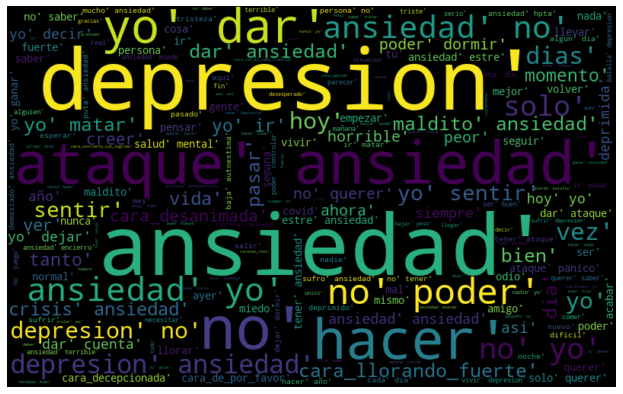

In [23]:
# Nube de palabras de Tweets sobre Depresion
plt.style.use('fivethirtyeight')
all_words = ' '.join([str(text) for text in tweets_depresivos_df['tweet_token']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

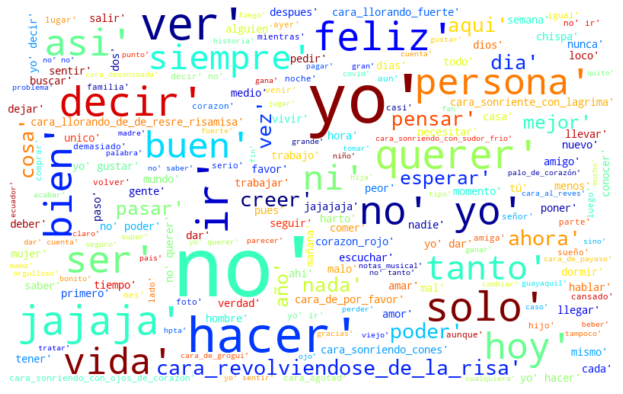

In [24]:
# Tweets Aleatorios
all_words = ' '.join([str(text) for text in tweets_random_df['tweet_token']])
wordcloud = WordCloud(background_color='white', colormap='jet', width=800, height=500, random_state=21, max_font_size=110).generate(all_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [25]:
#guardamos los dataset limpiados
tweets_depresivos_df.to_excel("Dataset_depresivo_Limpio.xlsx", index=False)
tweets_random_df.to_excel("Dataset_random_Limpio.xlsx", index=False)